# Pymaceuticals Inc.
---

## Analysis

In our study on tumor treatment efficacy in mice, we focused on the different drug regimens. Key findings include:

- Timepoint Observations: Capomulin, Ramicane, and Ketapril had the most observed timepoints, providing extensive data on tumor growth over time.

- Gender Distribution: The study had a balanced gender distribution with 51% male and 49% female mice, ensuring unbiased results.

- Outliers: Infubinol was the only regimen with significant outliers in tumor volume, indicating occasional deviations in its efficacy.

### Capomulin Insights
- Tumor Volume: Capomulin initially increased tumor volume, but with continued use, it gradually decreased, demonstrating long-term effectiveness.

- Weight Correlation: There was a linear correlation between mouse weight and tumor volume under Capomulin treatment, with larger tumors associated with heavier mice.

### Conclusion
Our findings highlight Capomulin’s potential for long-term tumor reduction and reveal important correlations between tumor burden and mouse weight. This study provides a solid foundation for further research on these drug regimens.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_number_mice = len(combined_data["Mouse ID"].unique())
unique_number_mice


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicates['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
rows_to_drop = combined_data[combined_data["Mouse ID"] == "g989"].index
clean_df = combined_data.drop(rows_to_drop)

clean_df.head()

#Alternative way
#clean_df = combined_data[~combined_data['Mouse ID'].isin(duplicate_mouse_ids)]



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_number_mice_clean = len(clean_df["Mouse ID"].unique())
unique_number_mice_clean

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_volume_median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_volume_std = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_volume_sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_summary = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean,
                              "Median Tumor Volume": tumor_volume_median,
                              "Tumor Volume Variance": tumor_volume_variance,
                              "Tumor Volume Std. Dev.": tumor_volume_std,
                              "Tumor Volume Std. Err.": tumor_volume_sem})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
tumor_summary_aggr = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_aggr

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

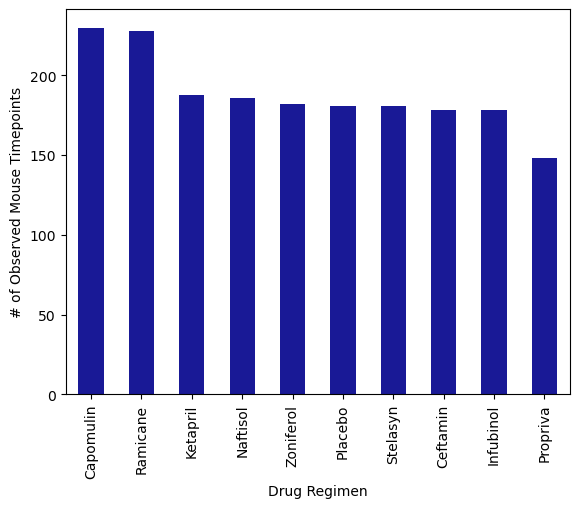

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Alternative way
#drug_regimen_and_ID = clean_df["Drug Regimen"].value_counts()

drug_regimen_and_ID = clean_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

drug_regimen_and_ID.plot(kind="bar", color='darkblue', alpha = 0.9, figsize=(6.5,5), ylabel = "# of Observed Mouse Timepoints")

plt.show()

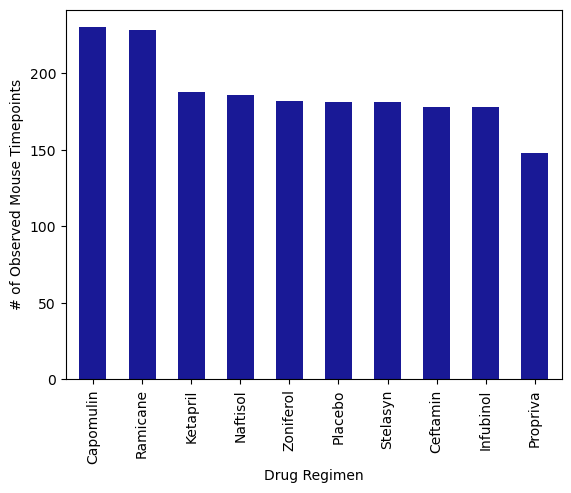

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_regimen_and_ID.index
y_axis = drug_regimen_and_ID.values

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

drug_regimen_and_ID_pyplot = plt.bar(x_axis, y_axis, color = "darkblue", alpha = 0.9, align = "center", width=0.55)

# Add title and labels
plt.xticks(rotation=90, ha='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlim(-0.55, len(x_axis)-.45)
plt.show()

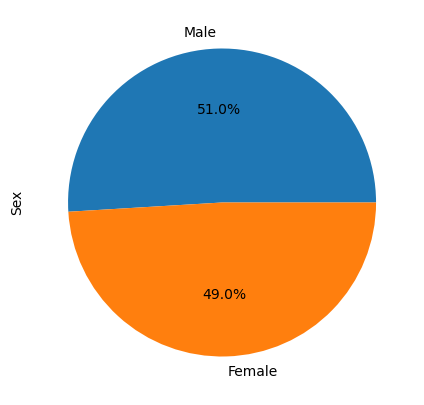

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_df['Sex'].value_counts()

sex_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5), ylabel = "Sex")

plt.show()

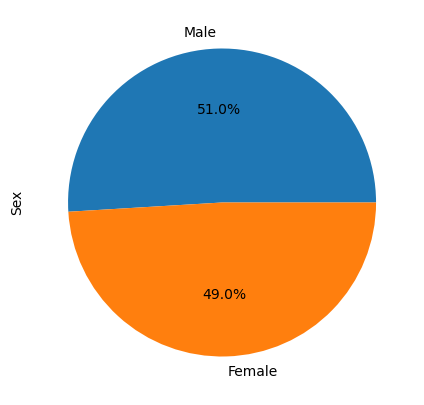

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = sex_counts.index
pie_data = sex_counts.values
plt.figure(figsize=(5, 5))
plt.pie(pie_data, labels = labels, autopct="%1.1f%%")

# Add title and labels
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_mouse = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_data_max_timepoint = pd.merge(max_timepoint_mouse, clean_df, how="left", on=['Mouse ID','Timepoint'])

combined_data_max_timepoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regime = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = combined_data_max_timepoint[combined_data_max_timepoint["Drug Regimen"].isin(treatment_regime)]

# Create a dictionary to store data for each treatment
treatment_data = {}
outliers = {}
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatment_regime:
    treatment_data[treatment] = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]

    # Create empty list to fill with tumor vol data (for plotting)
    tumor_vol_data.append(treatment_data[treatment]["Tumor Volume (mm3)"].tolist())
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = treatment_data[treatment]["Tumor Volume (mm3)"]
    
    # add subset
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers[treatment] = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"{treatment}'s potential outliers:")
    if not outliers[treatment].empty:
        print(outliers[treatment])
    else:
        print("Series([], Name: Tumor Volume (mm3), dtype: float64)")


Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


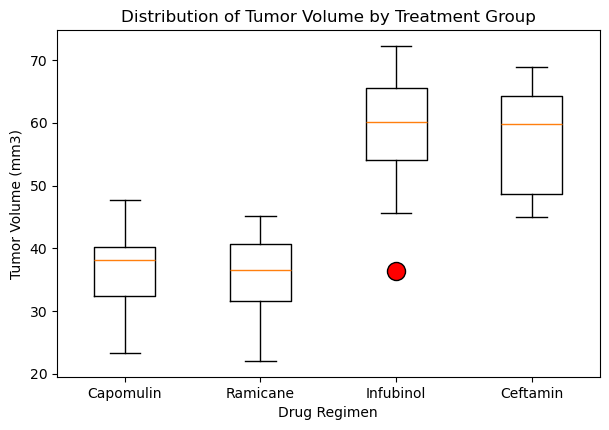

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(7, 4.5))
plt.boxplot(tumor_vol_data, labels=treatment_regime, flierprops=dict(marker='o', markerfacecolor='red', markersize=13))

# Add title and labels
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

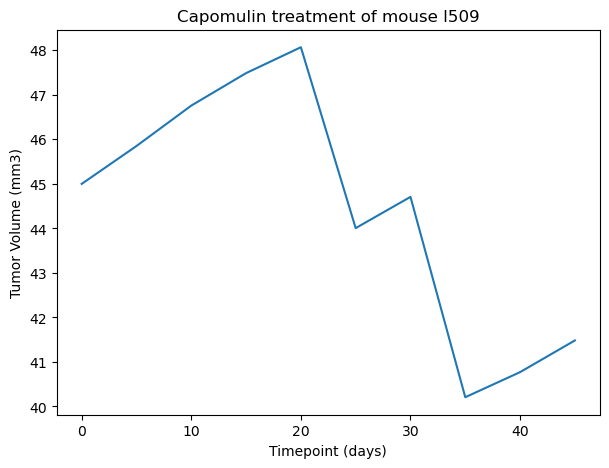

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Specify the mouse ID and treatment regimen
mouse_id = 'l509'
treatment = 'Capomulin'

mouse_data = clean_df[(clean_df["Drug Regimen"] == treatment) & (clean_df["Mouse ID"] == mouse_id)]

plt.figure(figsize=(7, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Add title and labels
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()




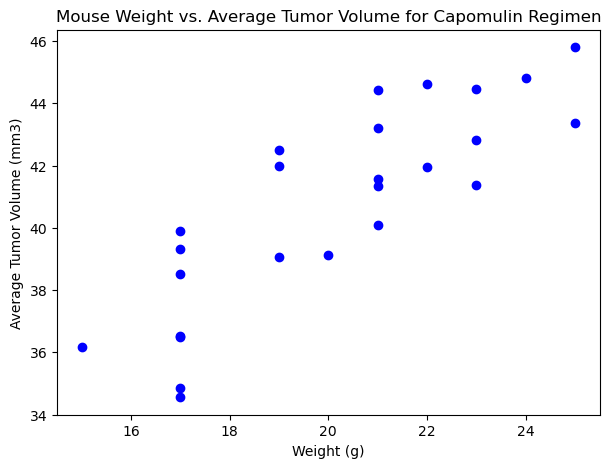

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Group the Capomulin data by Mouse ID and calculate the average weight and tumor volume for each mouse
avg_data = capomulin_data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})

avg_weight = avg_data["Weight (g)"]
avg_tumor_volume = avg_data["Tumor Volume (mm3)"]

plt.figure(figsize=(7, 5))
plt.scatter(avg_weight, avg_tumor_volume, marker='o', color='blue')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

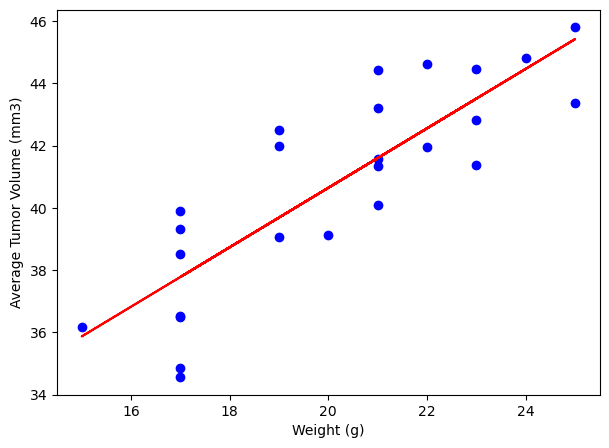

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data to include only mice treated with Capomulin
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

avg_data = capomulin_data.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})

avg_weight = avg_data["Weight (g)"]
avg_tumor_volume = avg_data["Tumor Volume (mm3)"]

# Calculate the correlation coefficient
correlation_coefficient = avg_weight.corr(avg_tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(avg_weight, avg_tumor_volume)

predicted_tumor_volume = slope * avg_weight + intercept

plt.figure(figsize=(7, 5))
plt.scatter(avg_weight, avg_tumor_volume, marker='o', color='blue', label='Data')
plt.plot(avg_weight, predicted_tumor_volume, color='red', label='Linear Regression')

# Add title, labels, and legend
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()